## BigQuery Spark Connector

Python does not currently support jar files loaded in an Environment. We load the required library into the session.

<mark>PLEASE VERIFY THE LAKEHOUSE (ABFSS) PATH TO THE JAR IS CORRECT FOR YOUR WORKSPACE</mark>

In [1]:
%%configure -f: 
{
    "conf": {
        "spark.jars": "abfss://0fb2d96e-53e7-4c49-a594-beb0891ac121@msit-onelake.dfs.fabric.microsoft.com/9c7403b4-606d-412c-9224-64ccdbff9cc3/Files/dependencies/spark-3.4-bigquery-0.36.1.jar"
    }
}  

StatementMeta(, , -1, SessionStarting, )

## Global Path Var for Required Config

In [6]:
config_json_path = "/env/config/fabric-poc-bq-config.json"

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 29, Finished, Available)

## Import Required Helper Classes

In [27]:
%run Loader

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 115, Finished, Available)

# Metadata Sync

In [16]:
config_metadata = ConfigMetadataLoader(config_json_path)

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 84, Finished, Available)

In [17]:
config_metadata.sync_bq_metadata()

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 85, Finished, Available)

In [18]:
config_metadata.auto_detect_table_profiles()

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 86, Finished, Available)

# Scheduler

In [19]:
scheduler = Scheduler(config_json_path)
scheduler.run()

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 87, Finished, Available)

# Loader

In [28]:
reload_config = False
schedule_loader = BQScheduleLoader(config_json_path, False, reload_config)

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 116, Finished, Available)

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 117, Finished, Available)

Load Activity: DemoData.dimension_employee_pk
Load Group Checkpoint: GROUP_100
Load Activity: DemoData.dimension_city
Load Group Checkpoint: GROUP_200


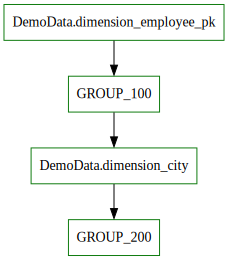

In [29]:
schedule_loader.run_aync_schedule()

In [30]:
tbls = ["bq_sync_configuration", "bq_sync_schedule", "bq_sync_schedule_telemetry"]

for tbl in tbls:
    table_maint = DeltaTableMaintenance(tbl)
    table_maint.optimize_and_vacuum()

StatementMeta(, 942adb9c-4be5-41ca-8f52-65b5a13fb119, 118, Finished, Available)